# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

# approximating contours using ApproxPOlyDP

In [1]:
import cv2
import matplotlib.pyplot as plt

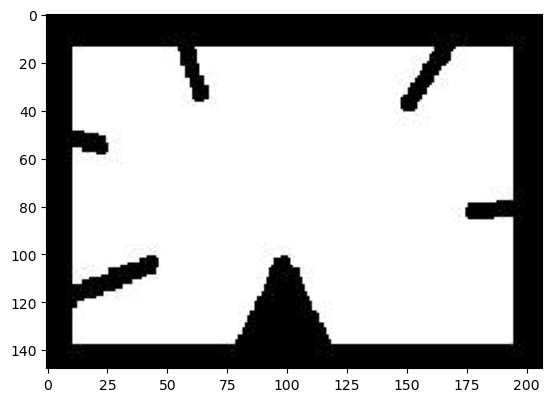

In [2]:
img = cv2.imread('images/approx.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

Text(0.5, 1.0, 'epsilon 0.01')

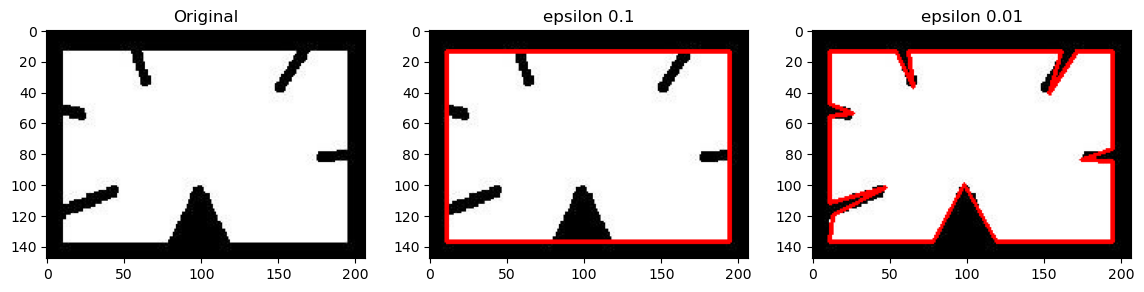

In [3]:
# approx contours
img = cv2.imread('images/approx.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
ret,thresh = cv2.threshold(gray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,1,2)

# first contour
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)

# approximate
first = img.copy()
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(first,[approx],0,(0,0,255),2)

second = img.copy()
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(second,[approx],0,(0,0,255),2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title('Original')
plt.subplot(132);plt.imshow(first[...,::-1]);plt.title('epsilon 0.1')
plt.subplot(133);plt.imshow(second[...,::-1]);plt.title('epsilon 0.01')

In [4]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
len(approx)

4

In [5]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
len(approx)

22

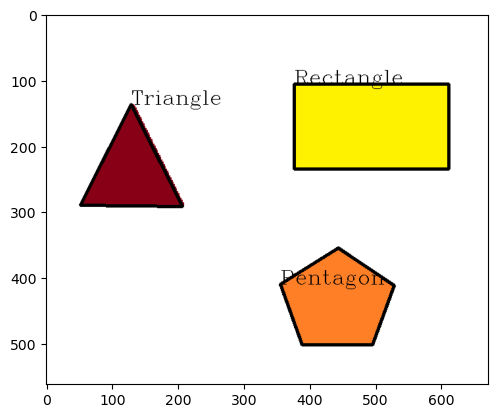

In [9]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('images/shapes2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
imagecontours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approximations = cv2.approxPolyDP(c, epsilon, True)
    cv2.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv2.putText(image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv2.putText(image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv2.putText(image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv2.putText(image, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv2.putText(image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

### Real example

Text(0.5, 1.0, 'Binary')

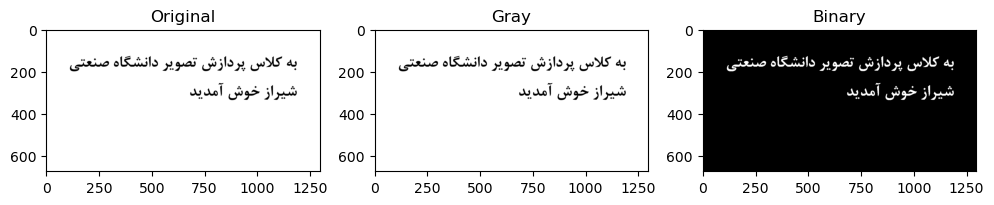

In [20]:
img = cv2.imread('images/farsi.png')
if img is None:
    print('Error')
else:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)


plt.figure(figsize=[12,8])
plt.subplot(131);plt.imshow(img,cmap='gray');plt.title('Original')
plt.subplot(132);plt.imshow(gray,cmap='gray');plt.title('Gray')
plt.subplot(133);plt.imshow(binary,cmap='gray');plt.title('Binary')

### Lets dilate to expand text

Text(0.5, 1.0, 'with contours')

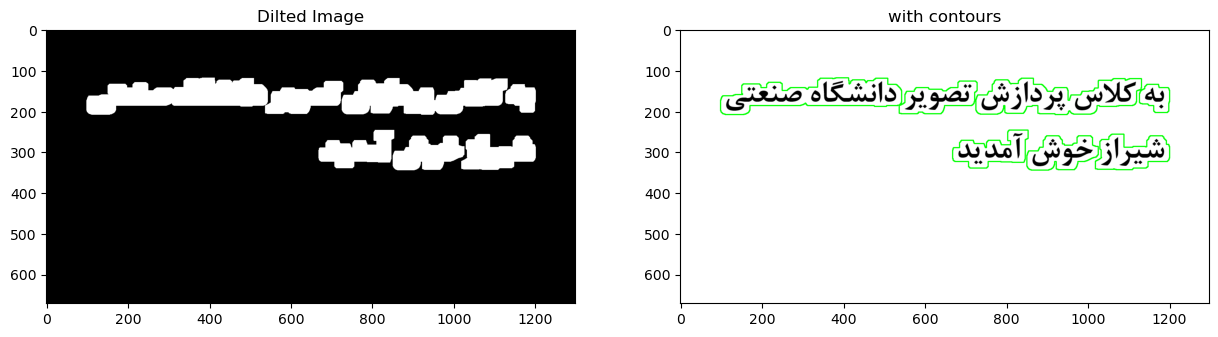

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,10)) # x is 15 y is 10
dilation = cv2.dilate(binary,kernel,iterations = 2)

copy_img = img.copy()

contours,heirarchy = cv2.findContours(dilation,
                                     cv2.RETR_EXTERNAL,
                                     cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(copy_img,contours,-1,(0,255,0),2)

plt.figure(figsize=[15,8])
plt.subplot(121);plt.imshow(dilation,cmap='gray');plt.title('Dilted Image')
plt.subplot(122);plt.imshow(all_contours,cmap='gray');plt.title('with contours')

### Estimating the contour region for filtering the required contours

Text(0.5, 1.0, 'Bounding Boxes')

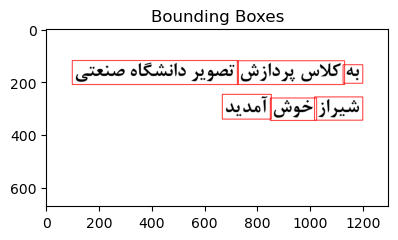

In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 10))
dilation = cv2.dilate(binary, kernel, iterations=2)

copy_img = img.copy()

contours, hierarchy = cv2.findContours(dilation,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)

MIN_AREA = 100  # مقدار حداقل مساحت کانتور برای حذف نویز

for c in contours:
    if cv2.contourArea(c) > MIN_AREA:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(copy_img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # قرمز

plt.figure(figsize=[15,8])
plt.subplot(131);plt.imshow(copy_img[..., ::-1]);plt.title('Bounding Boxes')


